In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [288]:
import pandas as pd
df = pd.read_csv('Dataset.csv')
print(df.head()) 
df = df.rename(columns={'individual': '100%'})

                                             comment   random   label  \
0                                     It was awesome   Artist   Music   
1                               Supper songs brother    Music   Music   
2                                     love you talha  useless  Artist   
3  this is not a song . this is some thing unique...   Artist   Music   
4                                         speechless    Music   Music   

  individual     75%      50%      25%      10%       5%  
0      Music   Music  useless  useless  useless  useless  
1      Music  Artist   Artist  useless    Music    Music  
2     Artist  Artist   Artist   Artist  useless   Artist  
3      Music   Music    Music    Music    Music    Music  
4      Music   Music  useless  useless  useless  useless  


In [290]:
def get_match_count(df,label, label2):
    count = 0
    for i in range(0, len(df)):
        if df[label][i] == df[label2][i]:
            count += 1

    return count

total = len(df)
match_random = get_match_count(df,'random', 'label')
match_individual = get_match_count(df,'100%', 'label')
match_75 = get_match_count(df,'75%', 'label')
match_50 = get_match_count(df,'50%', 'label')
match_25 = get_match_count(df,'25%', 'label')
match_10 = get_match_count(df,'10%', 'label')
match_5 = get_match_count(df,'5%', 'label')

# print percventages for all 
print(f'Random: {match_random/total*100}%')
print(f'100%: {match_individual/total*100}%')
print(f'75%: {match_75/total*100}%')
print(f'50%: {match_50/total*100}%')
print(f'25%: {match_25/total*100}%')
print(f'10%: {match_10/total*100}%')
print(f'5%: {match_5/total*100}%')

Random: 33.33333333333333%
100%: 74.69879518072288%
75%: 73.09236947791165%
50%: 66.66666666666666%
25%: 57.028112449799195%
10%: 53.01204819277109%
5%: 51.40562248995983%


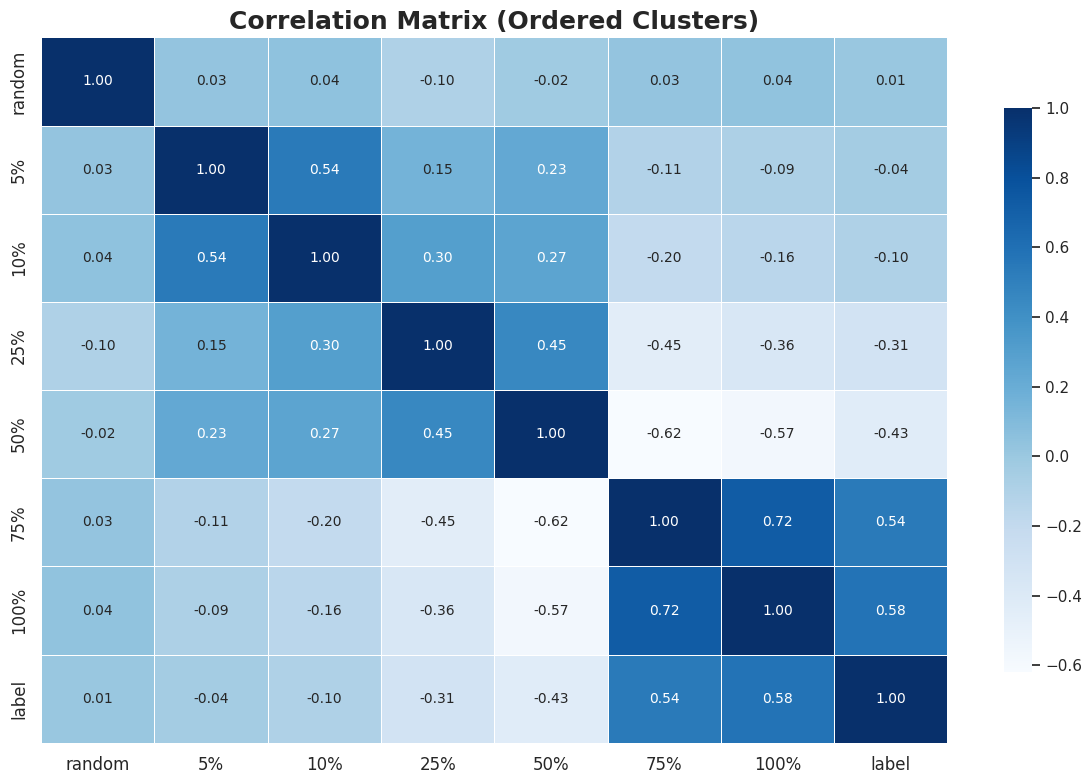

In [295]:
# make corr matrix of match between all labels
corr_matrix = df[['random', '5%', '10%', '25%', '50%', '75%', '100%','label']].apply(lambda x: x.factorize()[0]).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5, annot_kws={"size": 10}, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix (Ordered Clusters)', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

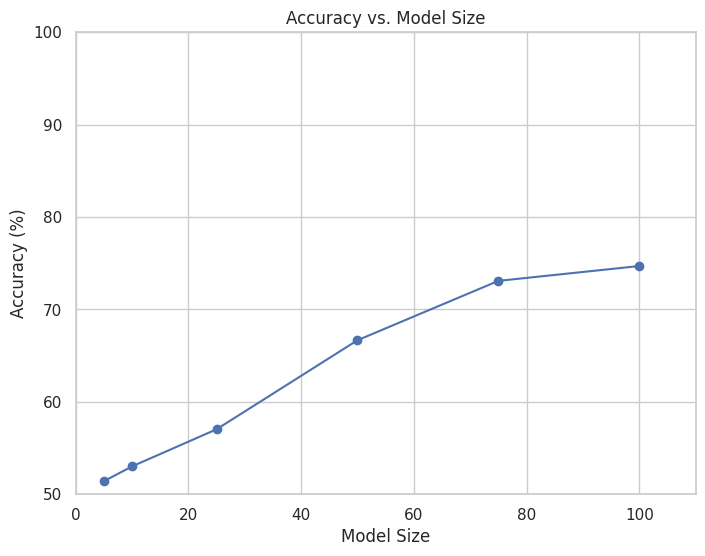

In [263]:
# plot accuracy along cluter size 
cluster_accuracy = [match_individual/total*100, match_75/total*100, match_50/total*100, match_25/total*100, match_10/total*100, match_5/total*100]
cluster_size = [100, 75, 50, 25, 10, 5]

plt.figure(figsize=(8, 6))
plt.plot(cluster_size, cluster_accuracy, marker='o')
plt.title('Accuracy vs. Model Size')
plt.xlabel('Model Size')
plt.ylabel('Accuracy (%)')
plt.xlim(110, 0)
plt.ylim(50, 100)
plt.grid(True)
plt.gca().invert_xaxis()  # Optional: to show decrease in size
plt.show()


In [264]:
# new_df copy of mergerd df with classes combined into main classes 
new_df = df.copy()

new_df['label'] = new_df['label'].replace({'Ambiguous': 'useless', 'Others': 'useless'})
new_df['random'] = new_df['random'].replace({'Ambiguous': 'useless', 'Others': 'useless'})
new_df['individual'] = new_df['individual'].replace({'Ambiguous': 'useless', 'Others': 'useless'})
new_df['75%'] = new_df['75%'].replace({'Ambiguous': 'useless', 'Others': 'useless'})
new_df['50%'] = new_df['50%'].replace({'Ambiguous': 'useless', 'Others': 'useless'})
new_df['25%'] = new_df['25%'].replace({'Ambiguous': 'useless', 'Others': 'useless'})
new_df['10%'] = new_df['10%'].replace({'Ambiguous': 'useless', 'Others': 'useless'})
new_df['5%'] = new_df['5%'].replace({'Ambiguous': 'useless', 'Others': 'useless'})

new_total = len(new_df)
new_match_random = get_match_count(new_df,'random', 'label')
new_match_individual = get_match_count(new_df,'individual', 'label')
new_match_75 = get_match_count(new_df,'75%', 'label')
new_match_50 = get_match_count(new_df,'50%', 'label')
new_match_25 = get_match_count(new_df,'25%', 'label')
new_match_10 = get_match_count(new_df,'10%', 'label')
new_match_5 = get_match_count(new_df,'5%', 'label')

# print percventages for all
print(f'Random: {new_match_random/new_total*100}%')
print(f'Individual: {new_match_individual/new_total*100}%')
print(f'75%: {new_match_75/new_total*100}%')
print(f'50%: {new_match_50/new_total*100}%')
print(f'25%: {new_match_25/new_total*100}%')
print(f'10%: {new_match_10/new_total*100}%')
print(f'5%: {new_match_5/new_total*100}%')

new_df.head()


Random: 33.33333333333333%
Individual: 74.69879518072288%
75%: 73.09236947791165%
50%: 66.66666666666666%
25%: 57.028112449799195%
10%: 53.01204819277109%
5%: 51.40562248995983%


,comment,random,label,individual,75%,50%,25%,10%,5%
0,It was awesome,Artist,Music,Music,Music,useless,useless,useless,useless
1,Supper songs brother,Music,Music,Music,Artist,Artist,useless,Music,Music
2,love you talha,useless,Artist,Artist,Artist,Artist,Artist,useless,Artist
3,this is not a song . this is some thing unique...,Artist,Music,Music,Music,Music,Music,Music,Music
4,speechless,Music,Music,Music,Music,useless,useless,useless,useless


In [265]:
def per_label_accuracy(temp_df, target_col):

    result = {}

    for col in temp_df.columns:
        if col == target_col:
            continue  # Skip the target column itself
        
        label_accuracies = {}
        for label in temp_df[col].unique():
            # Calculate accuracy for this label
            mask = temp_df[col] == label
            accuracy = (temp_df[target_col][mask] == label).mean()
            label_accuracies[label] = accuracy
        
        result[col] = label_accuracies
    
    accuracy_df = pd.DataFrame(result).fillna(0)
    
    return accuracy_df
    



In [266]:
accuracy_df = per_label_accuracy(new_df, 'label')
accuracy_df.tail(3)

,comment,random,individual,75%,50%,25%,10%,5%
Artist,0.0,0.187500,0.662162,0.657534,0.608696,0.500000,0.300000,0.339623
Music,0.0,0.322034,0.885246,0.808219,0.757143,0.640625,0.629630,0.600000
useless,0.0,0.412698,0.728070,0.728155,0.645455,0.566929,0.539062,0.534483


Text(46.25, 0.5, 'Human')

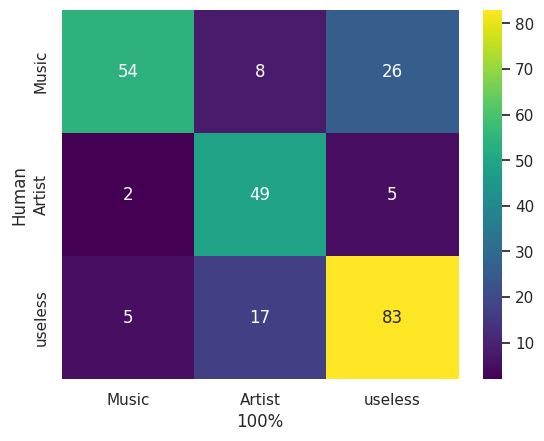

In [296]:
def label_corr(df, col1, col2):

    labels_col1 = df[col1].unique()
    labels_col2 = df[col2].unique()
    
    # Initialize a matrix to hold the counts
    matrix = pd.DataFrame(0, index=labels_col1, columns=labels_col2)
    
    # Count occurrences of each label combination
    for label1 in labels_col1:
        for label2 in labels_col2:
            matrix.loc[label1, label2] = ((df[col1] == label1) & (df[col2] == label2)).sum()
    
    
    return matrix


corr = label_corr(new_df, 'label', 'individual')
# plot as heatmap and label axis use viridis color map
sns.heatmap(corr, cmap='viridis', annot=True)
plt.xlabel('100%')
plt.ylabel('Human')
# plt.show()
# corr

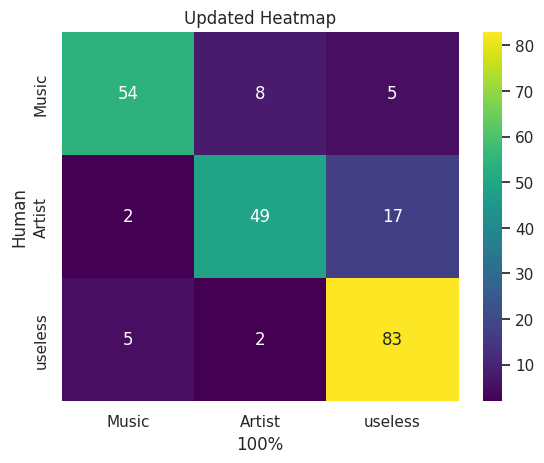

In [301]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Updated data with swapped values
data = np.array([[54, 8, 5],  # 26 swapped with 5
                 [2, 49, 17], # 17 swapped with 2
                 [5, 2, 83]])

# Plotting the heatmap
plt.figure()
ax = sns.heatmap(data, annot=True, cmap="viridis", fmt="d", cbar=True)

# Adding labels
plt.xlabel('100%')
plt.ylabel('Human')
ax.set_xticklabels(['Music', 'Artist', 'useless'])
ax.set_yticklabels(['Music', 'Artist', 'useless'], rotation=90)
plt.title("Updated Heatmap")
plt.show()


In [268]:
df= df.rename(columns={'individual': '100%'})

In [269]:
from sklearn.metrics import accuracy_score, classification_report
cluster_columns = ['random', '5%', '10%', '25%', '50%', '75%', '100%']
ground_truth = df['label']
accuracy_metrics = {}

for column in cluster_columns:
    overall_accuracy = accuracy_score(ground_truth, df[column])
    classification_metrics = classification_report(ground_truth, df[column], output_dict=True)
    accuracy_metrics[column] = {
        'overall_accuracy': overall_accuracy,
        'classification_metrics': classification_metrics
    }

metrics_summary = pd.DataFrame({
    cluster: {
        'Overall Accuracy': accuracy_metrics[cluster]['overall_accuracy'],
        'Precision (Music)': accuracy_metrics[cluster]['classification_metrics']['Music']['precision'],
        'Recall (Music)': accuracy_metrics[cluster]['classification_metrics']['Music']['recall'],
        'F1-score (Music)': accuracy_metrics[cluster]['classification_metrics']['Music']['f1-score'],
        'Precision (Artist)': accuracy_metrics[cluster]['classification_metrics']['Artist']['precision'],
        'Recall (Artist)': accuracy_metrics[cluster]['classification_metrics']['Artist']['recall'],
        'F1-score (Artist)': accuracy_metrics[cluster]['classification_metrics']['Artist']['f1-score'],
        'Precision (Useless)': accuracy_metrics[cluster]['classification_metrics']['useless']['precision'],
        'Recall (Useless)': accuracy_metrics[cluster]['classification_metrics']['useless']['recall'],
        'F1-score (Useless)': accuracy_metrics[cluster]['classification_metrics']['useless']['f1-score']
    }
    for cluster in cluster_columns
}).T

metrics_summary




,Overall Accuracy,Precision (Music),Recall (Music),F1-score (Music),Precision (Artist),Recall (Artist),F1-score (Artist),Precision (Useless),Recall (Useless),F1-score (Useless)
random,0.333333,0.322034,0.215909,0.258503,0.187500,0.214286,0.200000,0.412698,0.495238,0.450216
5%,0.514056,0.600000,0.545455,0.571429,0.339623,0.321429,0.330275,0.534483,0.590476,0.561086
10%,0.530120,0.629630,0.579545,0.603550,0.300000,0.214286,0.250000,0.539062,0.657143,0.592275
25%,0.570281,0.640625,0.465909,0.539474,0.500000,0.517857,0.508772,0.566929,0.685714,0.620690
50%,0.666667,0.757143,0.602273,0.670886,0.608696,0.750000,0.672000,0.645455,0.676190,0.660465
75%,0.730924,0.808219,0.670455,0.732919,0.657534,0.857143,0.744186,0.728155,0.714286,0.721154
100%,0.746988,0.885246,0.613636,0.724832,0.662162,0.875000,0.753846,0.728070,0.790476,0.757991


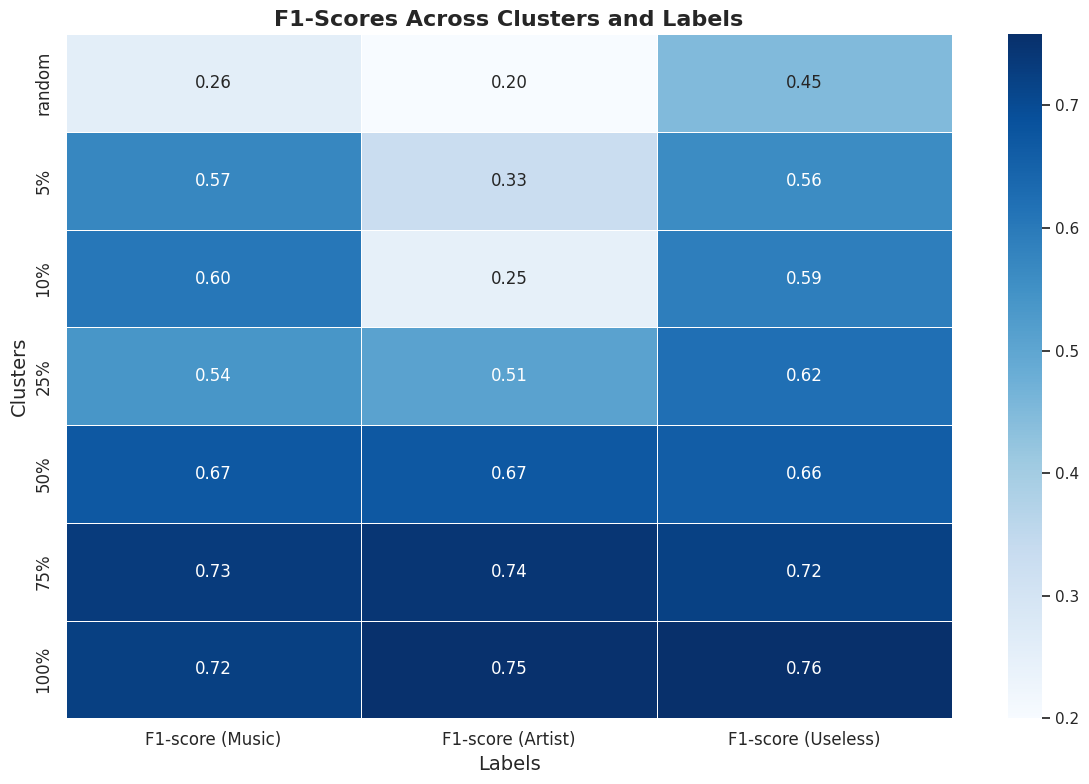

In [270]:
accuracy_df = metrics_summary.copy()
f1_scores = accuracy_df[
    ['F1-score (Music)', 'F1-score (Artist)', 'F1-score (Useless)']
]

plt.figure(figsize=(12, 8))
sns.heatmap(f1_scores, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('F1-Scores Across Clusters and Labels', fontsize=16, fontweight='bold')
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Clusters', fontsize=14)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


/tmp/ipykernel_38166/19452412.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_summary.index, y=metrics_summary['Overall Accuracy (%)'],color='b', palette='viridis', order=ordered_clusters)


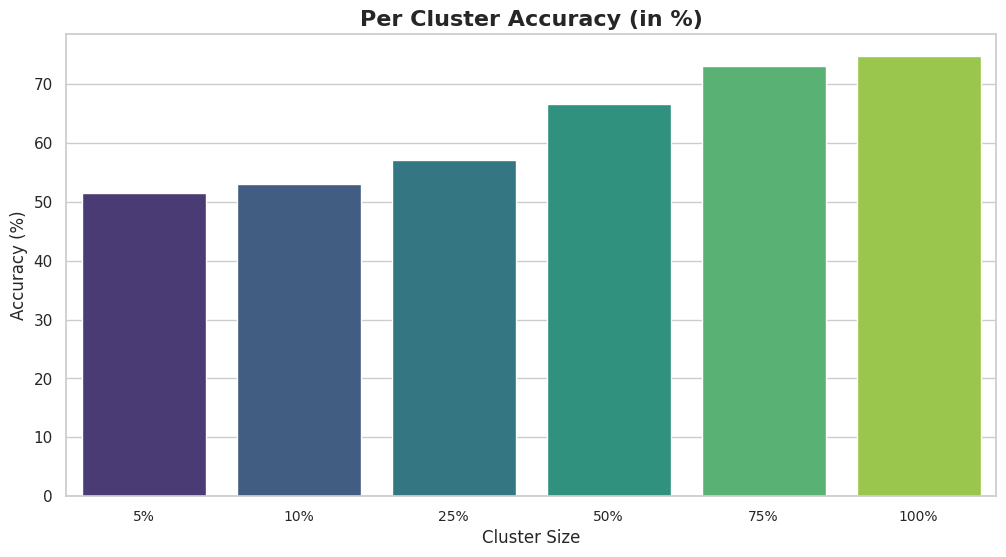

In [287]:
ordered_clusters = ['5%', '10%', '25%', '50%', '75%', '100%']
metrics_summary['Overall Accuracy (%)'] = metrics_summary['Overall Accuracy'] * 100
plt.figure(figsize=(12, 6))
# multi color bar plot
sns.barplot(x=metrics_summary.index, y=metrics_summary['Overall Accuracy (%)'],color='b', palette='viridis', order=ordered_clusters)
plt.title('Per Cluster Accuracy (in %)', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xlabel('Cluster Size', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.show()



/tmp/ipykernel_38166/4049630572.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_accuracy_df.index, y=label_accuracy_df['Accuracy (%)'], palette=["#FC8D62", "#66C2A5", "#8DA0CB"])


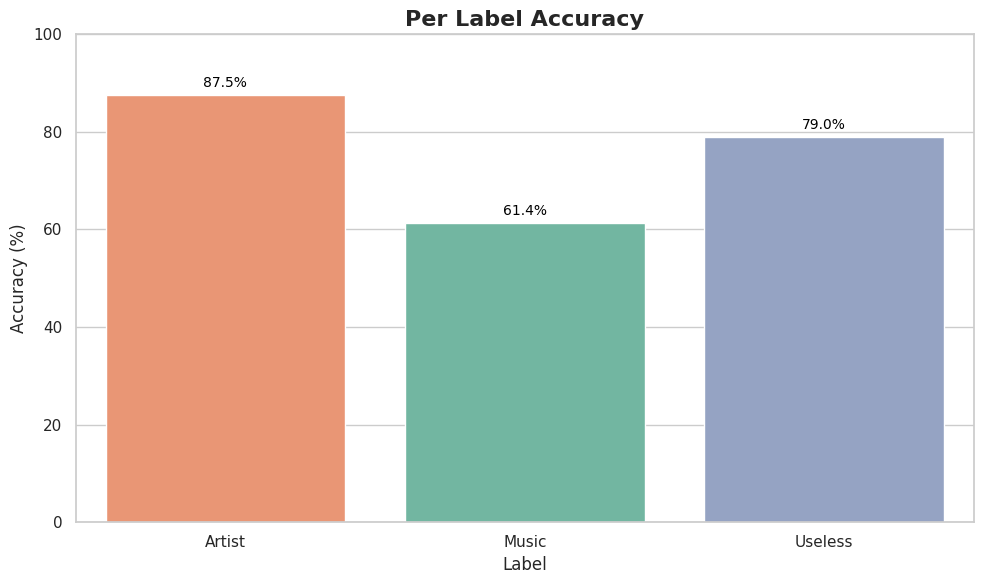

In [272]:
label_overall_accuracy = {}

for label in df['label'].unique():
    total_label = (df['label'] == label).sum()
    correct_label = ((df['label'] == label) & (df['100%'] == df['label'])).sum()
    label_overall_accuracy[label] = (correct_label / total_label) * 100 if total_label > 0 else 0
label_overall_accuracy = {k if k != 'useless' else 'Useless': v for k, v in label_overall_accuracy.items()}
label_accuracy_df = pd.DataFrame.from_dict(label_overall_accuracy, orient='index', columns=['Accuracy (%)'])
label_accuracy_df = label_accuracy_df.reindex(['Artist', 'Music', 'Useless'])

plt.figure(figsize=(10, 6))
sns.barplot(x=label_accuracy_df.index, y=label_accuracy_df['Accuracy (%)'], palette=["#FC8D62", "#66C2A5", "#8DA0CB"])
plt.title('Per Label Accuracy', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xlabel('Label', fontsize=12)
plt.ylim(0, 100) 
for i, value in enumerate(label_accuracy_df['Accuracy (%)']):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10, color='black')
plt.tight_layout()
plt.show()



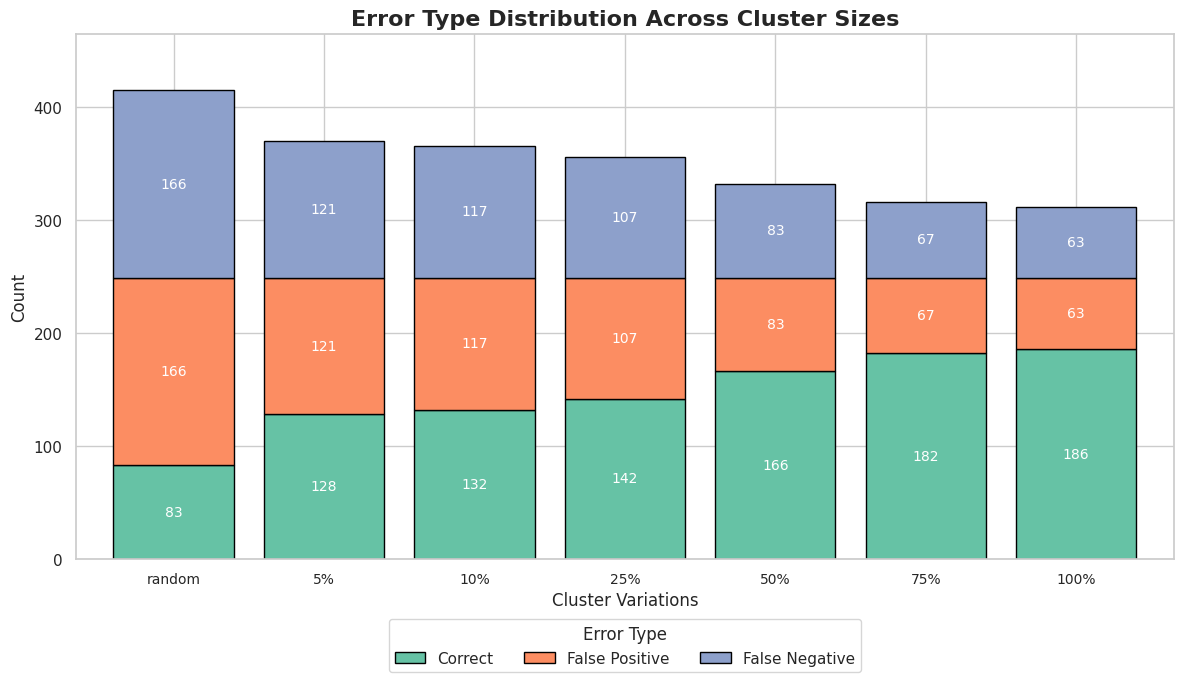

In [273]:
error_stats = pd.DataFrame(index=metrics_summary.index)

for cluster in metrics_summary.index:
    correct = (df[cluster] == df['label']).sum()
    false_positive = ((df[cluster] != df['label']) & (df[cluster] != "Useless")).sum()
    false_negative = ((df[cluster] != df['label']) & (df['label'] != "Useless")).sum()
    error_stats.loc[cluster, 'Correct'] = correct
    error_stats.loc[cluster, 'False Positive'] = false_positive
    error_stats.loc[cluster, 'False Negative'] = false_negative

plt.figure(figsize=(12, 7))
bars = error_stats.plot(
    kind='bar', 
    stacked=True, 
    color=["#66C2A5", "#FC8D62", "#8DA0CB"],  
    edgecolor='black', 
    width=0.8, 
    ax=plt.gca()
)
for i, cluster in enumerate(error_stats.index):
    for j, value in enumerate(error_stats.loc[cluster]):
        plt.text(i, error_stats.loc[cluster].iloc[:j].sum() + value / 2, 
                 int(value), ha='center', va='center', fontsize=10, color="white" if value > 20 else "black")

plt.title('Error Type Distribution Across Cluster Sizes', fontsize=16, fontweight= 'bold')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Cluster Variations', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.ylim(0, error_stats.sum(axis=1).max() + 50)  
plt.legend(
    title="Error Type", 
    loc="upper center", 
    bbox_to_anchor=(0.5, -0.1), 
    ncol=3
)

plt.tight_layout()
plt.show()




/tmp/ipykernel_38166/2608206960.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  label_accuracy_melted['Label Type'].replace({'useless': 'Useless'}, inplace=True)


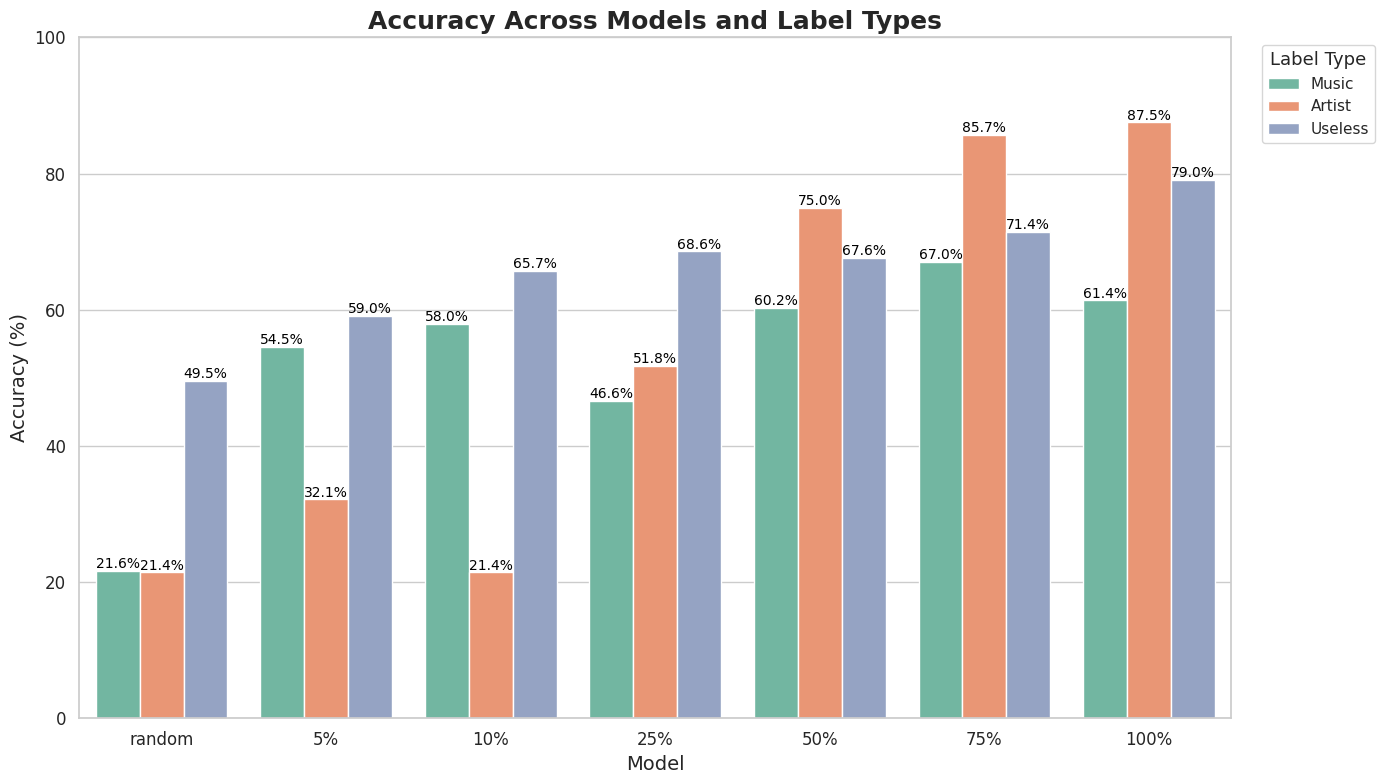

In [ ]:
label_accuracy = pd.DataFrame()

for cluster in metrics_summary.index:
    for label in df['label'].unique():
        total_label = (df['label'] == label).sum()
        correct_label = ((df[cluster] == df['label']) & (df['label'] == label)).sum()
        accuracy = (correct_label / total_label) * 100 if total_label > 0 else 0
        label_accuracy.loc[cluster, label] = accuracy

    'Artist': '#FC8D62',  
    'Useless': '#8DA0CB'  
}

plt.figure(figsize=(14, 8))
ax = sns.barplot(data=label_accuracy_melted, x='index', y='Accuracy', hue='Label Type', palette=custom_palette)

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:  
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2, height + 1), 
                    ha='center', va='center', fontsize=10, color='black')

# Enhancing the visuals
plt.title('Accuracy Across Models and Label Types', fontsize=18, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 100) 
plt.legend(title="Label Type", title_fontsize='13', fontsize='11', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


In [275]:
accuracy_df = per_label_accuracy(new_df, 'label')
accuracy_df.tail(3)

,comment,random,individual,75%,50%,25%,10%,5%
Artist,0.0,0.187500,0.662162,0.657534,0.608696,0.500000,0.300000,0.339623
Music,0.0,0.322034,0.885246,0.808219,0.757143,0.640625,0.629630,0.600000
useless,0.0,0.412698,0.728070,0.728155,0.645455,0.566929,0.539062,0.534483


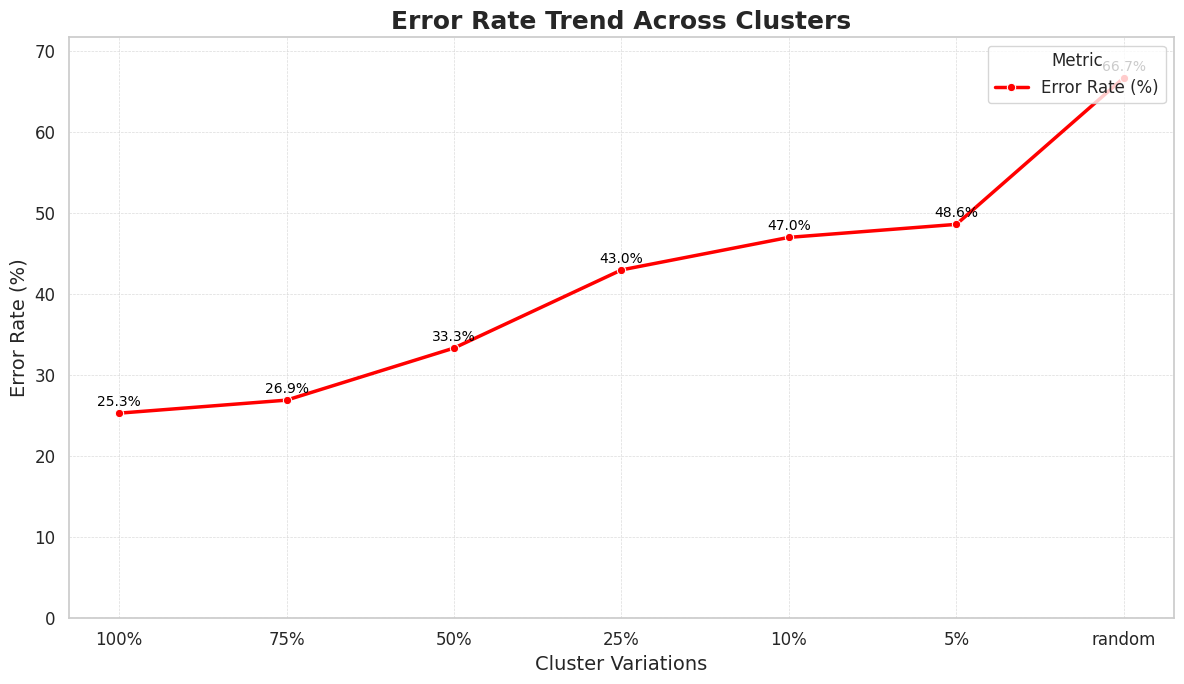

In [276]:
error_rates = {}

for cluster in metrics_summary.index:
    correct = (df[cluster] == df['label']).sum()
    total = len(df)
    error_rate = ((total - correct) / total) * 100 
    error_rates[cluster] = error_rate

error_df = pd.DataFrame.from_dict(error_rates, orient='index', columns=['Error Rate (%)'])
plt.figure(figsize=(12, 7))
sns.lineplot(x=error_df.index, y=error_df['Error Rate (%)'], marker='o', linewidth=2.5, color='red', label='Error Rate (%)')
for i, value in enumerate(error_df['Error Rate (%)']):
    plt.text(i, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=10, color='black')

# Enhance visuals
plt.title('Error Rate Trend Across Clusters', fontsize=18, fontweight='bold')
plt.ylabel('Error Rate (%)', fontsize=14)
plt.xlabel('Cluster Variations', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, error_df['Error Rate (%)'].max() + 5) 
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)  
plt.legend(loc='upper right', fontsize=12, title="Metric", title_fontsize=12)
# invert 
plt.gca().invert_xaxis()
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()



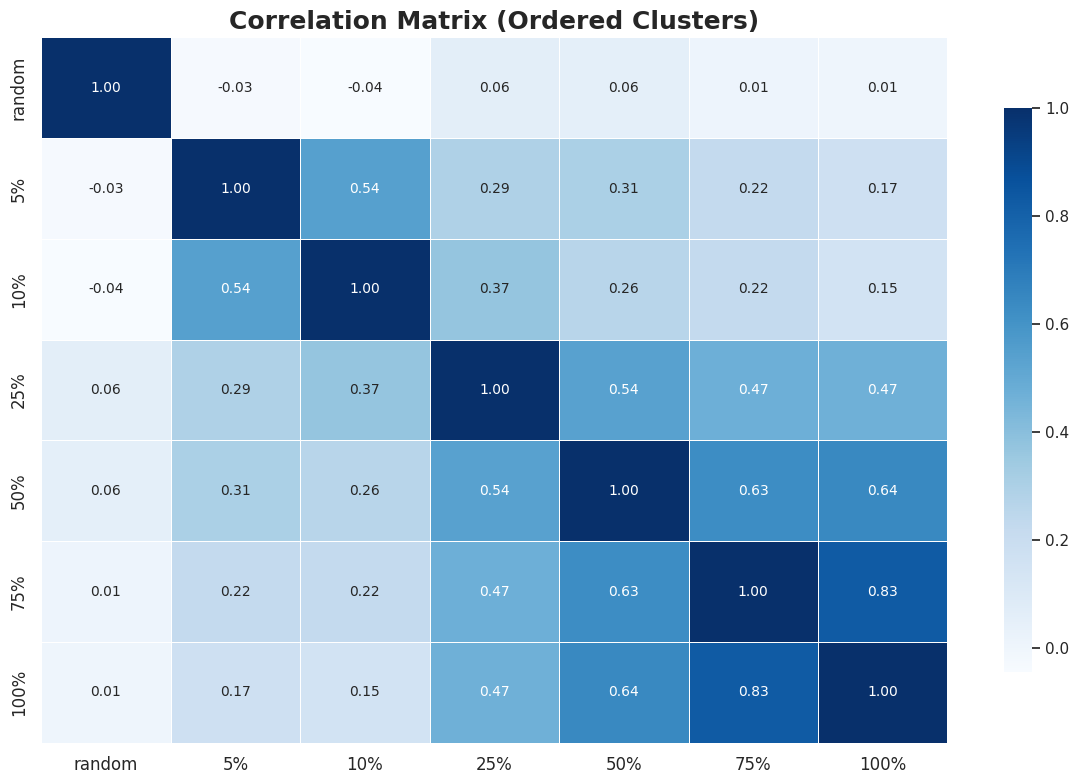

In [277]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['encoded_label'] = label_encoder.fit_transform(df['label'])
encoded_dataframe = df.copy()
for column in cluster_columns:
    encoded_dataframe[column] = label_encoder.transform(df[column])
ordered_cluster_columns = ['random', '5%', '10%', '25%', '50%', '75%', '100%']
encoded_correlation_matrix = encoded_dataframe[ordered_cluster_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(encoded_correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5, annot_kws={"size": 10}, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix (Ordered Clusters)', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()



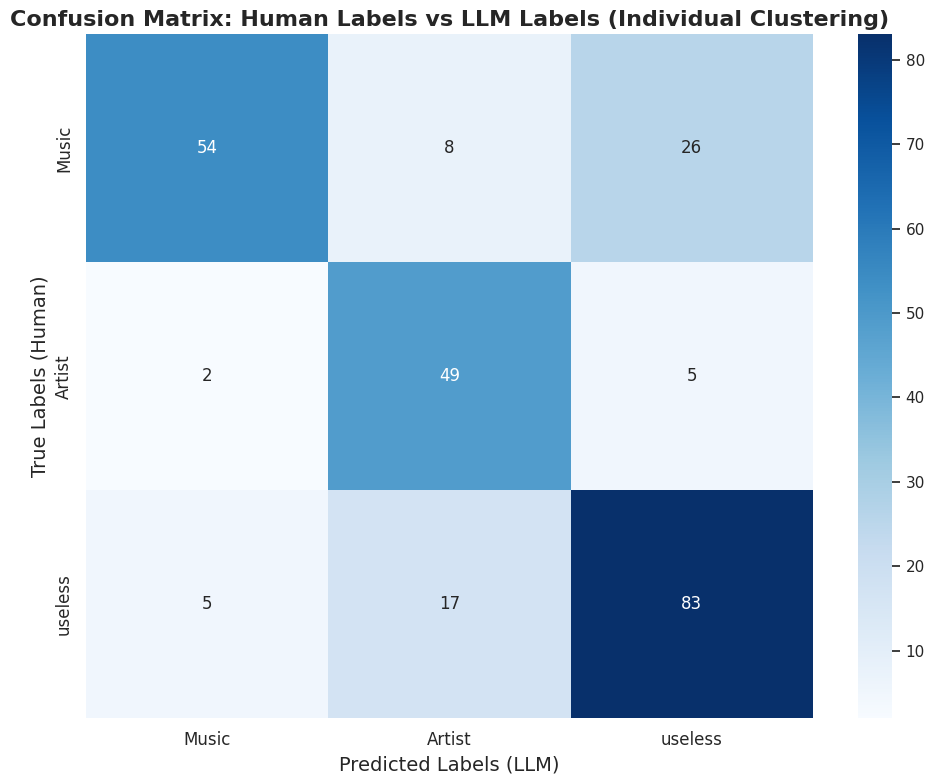

In [278]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(df['label'], df['100%'], labels=df['label'].unique())
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title('Confusion Matrix: Human Labels vs LLM Labels (Individual Clustering)', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Labels (LLM)', fontsize=14)
plt.ylabel('True Labels (Human)', fontsize=14)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [279]:
accuracy_df = per_label_accuracy(new_df, 'label')
accuracy_df.tail(3)

,comment,random,individual,75%,50%,25%,10%,5%
Artist,0.0,0.187500,0.662162,0.657534,0.608696,0.500000,0.300000,0.339623
Music,0.0,0.322034,0.885246,0.808219,0.757143,0.640625,0.629630,0.600000
useless,0.0,0.412698,0.728070,0.728155,0.645455,0.566929,0.539062,0.534483


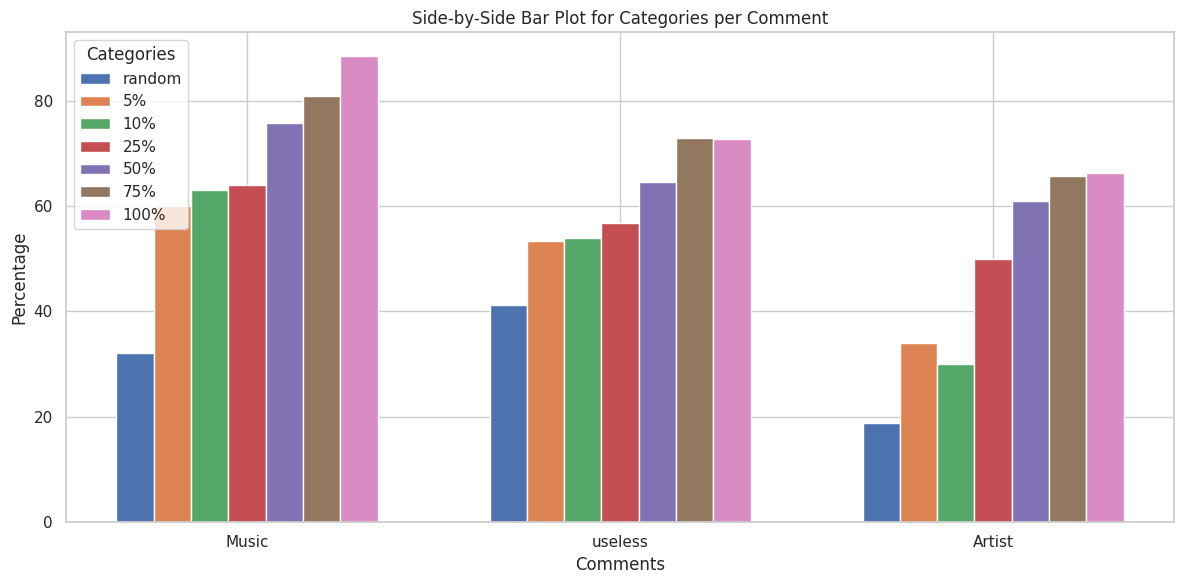

In [282]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data
data = {
    "comment": ["Music", "useless", "Artist"],
    "random": [ 0.322034, 0.412698, 0.187500,],
    "5%": [ 0.600000, 0.534483, 0.339623],
    "10%": [ 0.629630, 0.539062, 0.300000],
    "25%": [ 0.640625, 0.566929, 0.500000],
    "50%": [ 0.757143, 0.645455, 0.608696],
    "75%": [ 0.808219, 0.728155, 0.657534],
    "100%": [ 0.885246, 0.728070, 0.662162],
}
df = pd.DataFrame(data)

# Extracting categories and comments
categories = df.columns[1:]  # Exclude 'comment'
comments = df['comment']

# Data for plotting x 100 for percentage
values = df[categories].values * 100
N = len(comments)  # Number of comment categories
width = 0.1  # Bar width
ind = np.arange(N)  # x-axis positions for groups

# Create the plot
plt.figure(figsize=(12, 6))

# Plot each category
for i, category in enumerate(categories):
    plt.bar(ind + i * width, values[:, i], width, label=category)

# Add labels, title, and legend
plt.xlabel("Comments")
plt.ylabel("Percentage")
plt.title("Side-by-Side Bar Plot for Categories per Comment")
plt.xticks(ind + width * (len(categories) - 1) / 2, comments)
plt.legend(title="Categories", loc='best')

# Display the plot
plt.tight_layout()
plt.show()


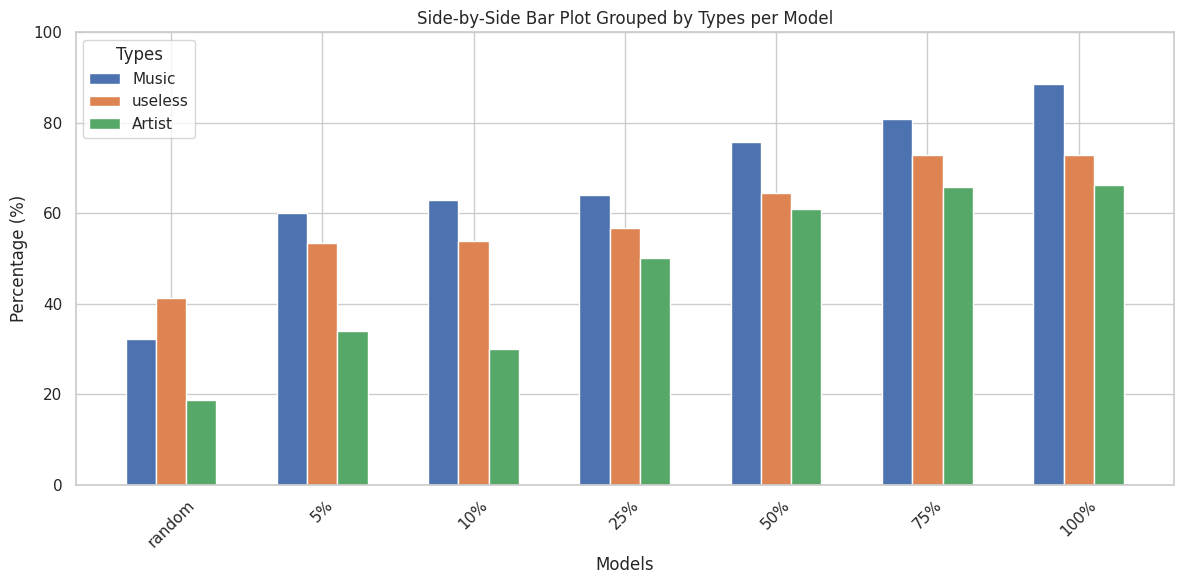

In [283]:
# Transposing the data to group by types (categories)
df_melted = df.set_index("comment").T

# Extracting models (random, individual, etc.) and types (Artist, Music, useless)
models = df_melted.index
types = df_melted.columns

# Data for plotting
values = df_melted.values
N = len(models)  # Number of models
width = 0.2  # Bar width
ind = np.arange(N)  # x-axis positions for groups

# Create the plot
plt.figure(figsize=(12, 6))

# Plot each type
for i, type_ in enumerate(types):
    plt.bar(ind + i * width, values[:, i] * 100, width, label=type_)  # Multiply values by 100 for percentage

# Add labels, title, and legend
plt.xlabel("Models")
plt.ylabel("Percentage (%)")  # Update y-axis label
plt.title("Side-by-Side Bar Plot Grouped by Types per Model")
plt.xticks(ind + width * (len(types) - 1) / 2, models, rotation=45)
plt.legend(title="Types", loc='best')
# plot 100 on y axis
plt.ylim(0, 100)


# Display the plot
plt.tight_layout()
plt.show()

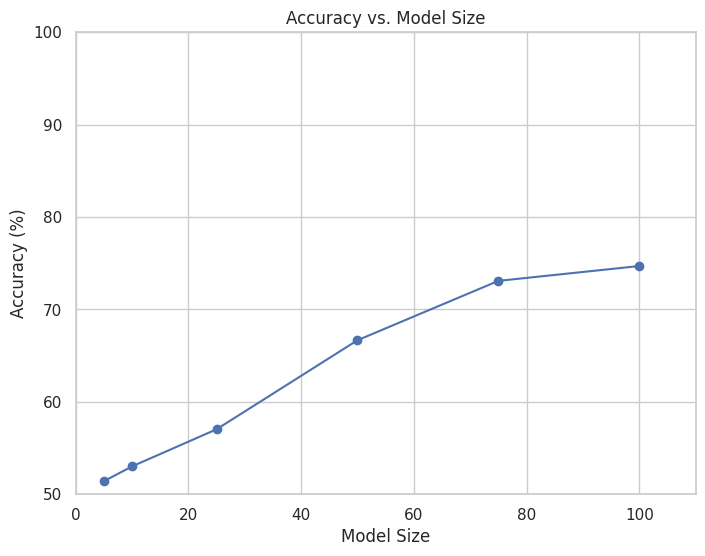

In [ ]:
# plot accuracy along cluter size 
cluster_accuracy = [match_individual/total*100, match_75/total*100, match_50/total*100, match_25/total*100, match_10/total*100, match_5/total*100]
cluster_size = [100, 75, 50, 25, 10, 5]

plt.figure(figsize=(8, 6))
plt.plot(cluster_size, cluster_accuracy, marker='o')
plt.title('Accuracy vs. Model Size')
plt.xlabel('Model Size')
plt.ylabel('Accuracy (%)')
plt.xlim(110, 0)
plt.ylim(50, 100)
plt.grid(True)
plt.gca().invert_xaxis()  # Optional: to show decrease in size
plt.show()


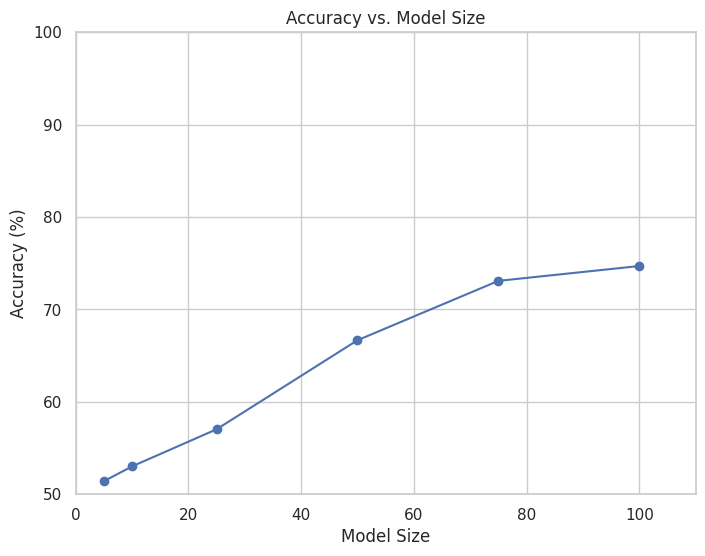

In [ ]:
# plot accuracy along cluter size 
cluster_accuracy = [match_individual/total*100, match_75/total*100, match_50/total*100, match_25/total*100, match_10/total*100, match_5/total*100]
cluster_size = [100, 75, 50, 25, 10, 5]

plt.figure(figsize=(8, 6))
plt.plot(cluster_size, cluster_accuracy, marker='o')
plt.title('Accuracy vs. Model Size')
plt.xlabel('Model Size')
plt.ylabel('Accuracy (%)')
plt.xlim(110, 0)
plt.ylim(50, 100)
plt.grid(True)
plt.gca().invert_xaxis()  # Optional: to show decrease in size
plt.show()
